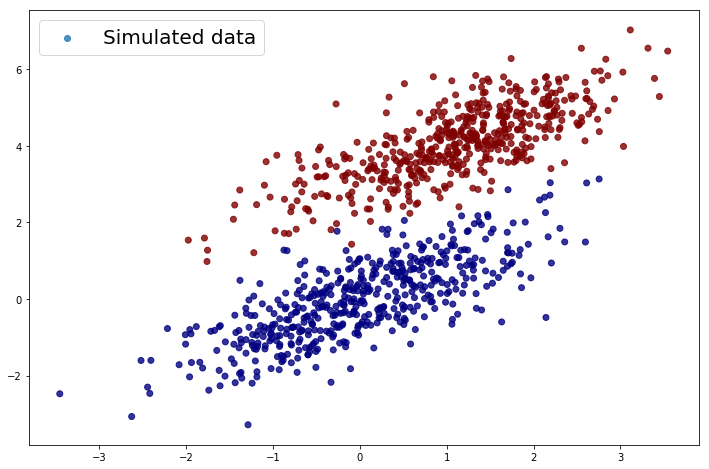

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

np.random.seed(12)
num_observ = 500

x1 = np.random.multivariate_normal([0,0], [[1, .75],[.75,1]], num_observ)
x2 = np.random.multivariate_normal([1,4], [[1, .75],[.75,1]], num_observ)

simulated_data = np.vstack((x1,x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observ),np.ones(num_observ)))
plt.figure(figsize=(12,8))
plt.scatter(simulated_data[:,0],simulated_data[:,1], c = simulated_labels,
            alpha = 0.8,cmap=cm.jet, label = "Simulated data")
plt.legend(loc = "upper left", fontsize=20)
plt.savefig('log_reg_1.eps', format='eps', dpi=1000)

In [4]:
def sigmoid(scores):              # score = w^Tx
    return 1/(1+np.exp(-scores))  #sigmoid function

def log_likelihood(features, target, weights): 
    scores = np.dot(features,weights)
    ll = np.sum(target*scores - np.log(1+np.exp(scores)))
    return ll

def logistic_regression(features, target, num_steps, learning_rate, 
                        add_intercept = False):
    if add_intercept: 
        intercept = np.ones((features.shape[0],1))
        features = np.hstack((intercept, features))
    
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features,weights)
        predictions = sigmoid(scores)
        
        #update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T,output_error_signal)
        weights += learning_rate*gradient
    
        #print log-likelihood 
        #if step %1000 == 0:
            #print (log_likelihood(features, target,weights))
      
    return weights
    
weights = logistic_regression(simulated_data, simulated_labels, 
                              num_steps = 300000, learning_rate = 5e-5,
                             add_intercept = True) 
print(weights)

[-15.12574929  -5.07672109   8.4432816 ]


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_data, simulated_labels)

print (clf.intercept_, clf.coef_)
print (weights)

[-20.25598596] [[-6.63566988 11.17528299]]
[-15.12574929  -5.07672109   8.4432816 ]


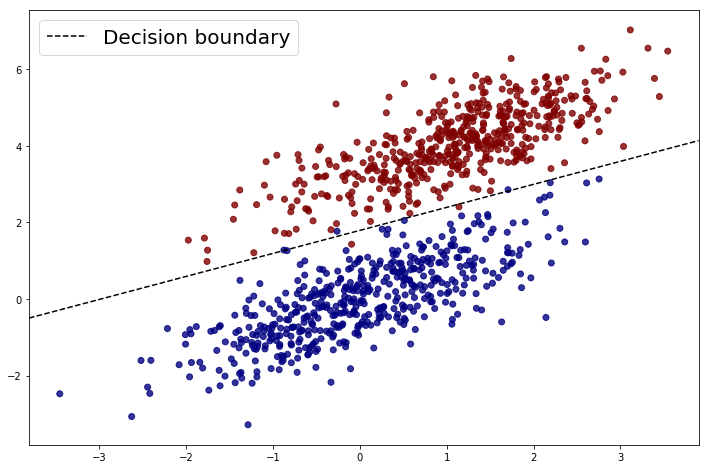

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_data[:,0],simulated_data[:,1], c = simulated_labels,
            alpha = 0.8,cmap=cm.jet)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(weights[0]+ x_vals*weights[1])/weights[2]
plt.plot(x_vals, y_vals, '--', c="black", label = "Decision boundary")
plt.legend(loc = "upper left", fontsize =20)
plt.savefig('log_reg_2.eps', format='eps', dpi=1000)